# exploratory data analysis - bidding zone NO1 and neighboring zones for the year of 2022

In [17]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization


## About the dataset

Hourly electricity prices and external factors for bidding zone NO1 (Norway Østlandet) and neightbouring zones (NO2, NO3, NO5 and SE3).

**Source of the datasets data::** https://transparency.entsoe.eu/dashboard/show

**Attribute information:**

**Target feature:** 	**Day-ahead Price** Spot (day-ahead) market prices in the currency Euro per MWh (megawatt-hour).
1.	**Start MTU (UTC):** Start datetime of the interval for the measured values
2.	**Start MTU (UTC):** End time of the interval for the measured values
3.	**Actual Total Load:** The power consumption in each zone per MW (megawatt)
4.	**Biomass:** Energy production in MW  from Biomass.
5.	**Fossil Gas:** Energy production in MW  from Fossil Gas.
6.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage.
7.	**Hydro Water Reservoir:** Energy production in MW  from Hydro Run-of-river and poundage.
8.	**Wind Onshore:** Energy production in MW  from onshore wind.
9.	**Hydro Pumped Storage Aggregated:** Energy production in MW  from Hydro Pumped Storage Aggregated.
10.	**Hydro Run-of-river and poundage:** Energy production in MW  from Hydro Run-of-river and poundage
11.	**Other renewable:** Energy production in MW  from Other renewable.
12.	**Marine:** Energy production in MW  from Marine.
13.	**Solar:** Energy production in MW  from Solar.
14.	**CBF BZN|x > BZN|y [MWh]:**  Cross-border physical flow in MWH (mega watt hour), zone x is export zone and zone y is import zone.
15.	**Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh]:** Stored Energy Value in Water Reservoirs and Hydro Storage Plants measured in MwH (mega watt hour)

### Importing dataset and printing out the resulting dataframe

In [18]:
# reding in the dataset to a dataframe
df = pd.read_csv('../datasets/no1_aggregated/no1_2020_to_2022_aggregated.csv')

# printing out the 5 first rows of the dataset
df.head()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,2020-01-01 00:00:00,2020-01-01 01:00:00,31.77,31.77,28.45,31.77,28.45,4333.0,4139.0,3016.0,...,0.0,1449.0,0.0,391,0,3.962493e+06,2.438936e+07,5.608103e+06,1.119240e+07,2.209379e+06
1,2020-01-01 01:00:00,2020-01-01 02:00:00,31.57,31.57,27.90,31.57,27.90,4250.0,4114.0,2945.0,...,0.0,1283.0,0.0,348,0,3.961448e+06,2.439155e+07,5.608290e+06,1.119184e+07,2.209164e+06
2,2020-01-01 02:00:00,2020-01-01 03:00:00,31.28,31.28,27.52,31.28,27.52,4167.0,4030.0,3032.0,...,6.0,962.0,0.0,500,0,3.960404e+06,2.439372e+07,5.608466e+06,1.119128e+07,2.208948e+06
3,2020-01-01 03:00:00,2020-01-01 04:00:00,30.72,30.72,27.54,30.72,27.54,4145.0,4032.0,2988.0,...,6.0,767.0,0.0,610,0,3.959359e+06,2.439589e+07,5.608632e+06,1.119071e+07,2.208733e+06
4,2020-01-01 04:00:00,2020-01-01 05:00:00,30.27,30.27,26.55,30.27,26.55,4222.0,4032.0,2848.0,...,22.0,642.0,0.0,909,0,3.958314e+06,2.439805e+07,5.608788e+06,1.119013e+07,2.208518e+06


In [19]:
# printing out the 5 last rows of the dataset
df.tail()

,start MTU (UTC),end MTU (UTC),Day-ahead Price [EUR/MWh] BZN|NO1,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
26299,2022-12-31 19:00:00,2022-12-31 20:00:00,123.61,123.61,23.82,123.61,11.57,4650.0,4333.0,3612.0,...,0.0,43.0,0.0,2083,0,3.776753e+06,2.120224e+07,4.758064e+06,1.172317e+07,1.590230e+06
26300,2022-12-31 20:00:00,2022-12-31 21:00:00,121.09,121.09,23.93,121.09,14.89,4573.0,4270.0,3605.0,...,0.0,24.0,0.0,2097,0,3.775572e+06,2.119830e+07,4.754910e+06,1.171994e+07,1.590075e+06
26301,2022-12-31 21:00:00,2022-12-31 22:00:00,120.00,120.00,23.75,120.00,9.94,4453.0,4294.0,3479.0,...,0.0,41.0,0.0,2007,0,3.774389e+06,2.119430e+07,4.751735e+06,1.171668e+07,1.589917e+06
26302,2022-12-31 22:00:00,2022-12-31 23:00:00,119.98,119.98,23.56,119.98,4.84,4389.0,4282.0,3415.0,...,0.0,0.0,29.0,2119,0,3.773202e+06,2.119026e+07,4.748539e+06,1.171340e+07,1.589755e+06
26303,2022-12-31 23:00:00,2023-01-01 00:00:00,119.32,119.32,23.35,119.32,2.01,4444.0,4182.0,3346.0,...,0.0,0.0,12.0,1612,0,3.772012e+06,2.118617e+07,4.745322e+06,1.171010e+07,1.589588e+06


In [20]:
# printing out the shape of the dataset
df.shape

(26304, 58)

We can see that the time series data is measured in intervals of 1 hour, and that we have 26304 rows starting at the start of 2020, ending at the end of 2022. Furthermore, we see that we have 58 columns which each belong to one of the 15 feature categories or the target feature.

In [21]:
# printing out info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 58 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   start MTU (UTC)                                                                26304 non-null  object 
 1   end MTU (UTC)                                                                  26304 non-null  object 
 2   Day-ahead Price [EUR/MWh] BZN|NO1                                              26304 non-null  float64
 3   Day-ahead Price [EUR/MWh] BZN|NO2                                              26304 non-null  float64
 4   Day-ahead Price [EUR/MWh] BZN|NO3                                              26304 non-null  float64
 5   Day-ahead Price [EUR/MWh] BZN|NO5                                              26304 non-null  float64
 6   Day-ahead Price [EUR/M

We Can see that the datetime columns are of the data type object, so we ned to convert it into the data type datetime. The remaining values are numerical data and have appropriate data types.

We also notice that the value onthe 'non-null count' of allot of the columns are less than the size of the dataset (26304), and we therefore know that allot of the features have missing values. We should therefore investigate which values are misssing, and handle the missing values accordingly. We will handle the missing values once the data has been split into training and test data, this is to avoid data leakage where training data contains information about the target data which will not be available when the final model is used for prediction, causing the preformance to be artificially high.

In [24]:
# converting datetime columns to data type datetime
df['start MTU (UTC)'] = pd.to_datetime(df['start MTU (UTC)'])
df['end MTU (UTC)'] = pd.to_datetime(df['end MTU (UTC)'])

### Exploring feature correlation:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 58 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   start MTU (UTC)                                                                26304 non-null  datetime64[ns]
 1   end MTU (UTC)                                                                  26304 non-null  datetime64[ns]
 2   Day-ahead Price [EUR/MWh] BZN|NO1                                              26304 non-null  float64       
 3   Day-ahead Price [EUR/MWh] BZN|NO2                                              26304 non-null  float64       
 4   Day-ahead Price [EUR/MWh] BZN|NO3                                              26304 non-null  float64       
 5   Day-ahead Price [EUR/MWh] BZN|NO5                                              26

We will now explore the graphs of each feature category starting with the target feature:

### EDA Day-ahead Price (target feature) 

We start by plotting the day-ahead price for each zone:

array([<AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>,
       <AxesSubplot:xlabel='start MTU (UTC)'>], dtype=object)

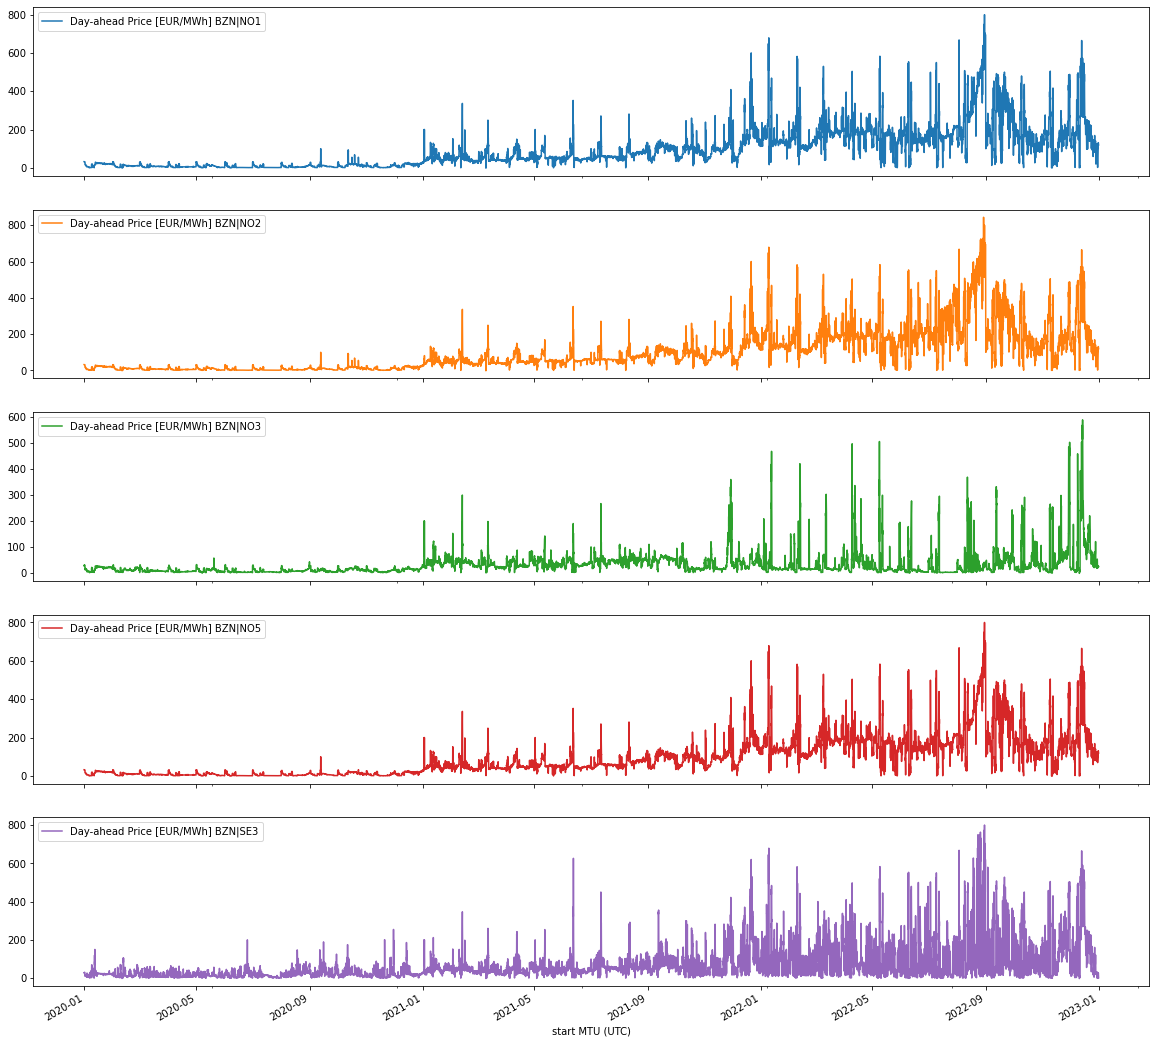

In [26]:
# creating a dataset containing only datetime and day-ahead price for the different zones
price_column_names = [col_name for col_name in df.columns if 'Day-ahead Price' in col_name]

price_columns = df.loc[:, price_column_names]


price_columns.plot(subplots=True, x='start MTU (UTC)', figsize=(20, 20))

We can see that the price increases  over time, and that there is a significant shift over the period from 2021 to 2022, and a smaller shift over the period from 2020 to 2021. We can also see that the prive volatility increases over time. The shifts in volatility seem to somewhat align with the shifts to higher prices.

This large shift to higher prices and higher volatility of prices might impeed the algorithms ability to train a model on the data with a high performance in it's price prediction. It might therefore be of value to train one model on the entire dataset and one model on the last year (after the price shift), and compare their performance to see if the performance is increased.

## Handling missing values

In [ ]:
# printing out summary of missing values in the dataset:
df.isna().sum()

We can now see which features are missing values, and how many values are missing from each feature. We will handle the missing values feature by feature starting with 'Actual Total Load [MW]'

### Handling missing values for load columns
We can start by checking which rows are missing values for load features.

In [ ]:
# creating a list of load column names
load_column_names = [col_name for col_name in df.columns if 'Actual Total Load' in col_name]

# creating a new dataframe of load columns and start datetime
load_columns = df.loc[:, load_column_names]
load_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the 'Actual Total Load' columns
load_columns[load_columns[load_column_names].isnull().any(1)]

It seems like none of the Norwegian bidding zones have recorded data for the time interval 31.10.2021 01:00 - 31.10.2021 02:00.

Since it is a dingle row with a missing vlaue, we can simply impute the missing value through interpolation which uses the neighbouring values to generate an the missing intermediary value. We choose to use spline interpolation which estimates the missing values while focusing on minimizing the curvature  of the value graph. 

In [ ]:
# performing splilne inerpolation to fill missing values in load columns
for col in load_column_names:
    df[col] = df[col].interpolate(option='spline')

# checking if all the missing values in load columns have been filled:
df.loc[:, load_column_names].isna().sum()

We can see the the 'load' columns no longer conntains any missing values.

### Handling missing values for Hydro Run-of-river and poundage columns


In [ ]:
# creating a list of Hydro Run-of-river and poundage  column names
hydro_run_of_column_names = [col_name for col_name in df.columns if 'Hydro Run-of-river and poundage' in col_name]

# creating a new dataframe of hydro run of river and pondaage columns and start datetime
hydro_run_of_columns = df.loc[:, hydro_run_of_column_names]
hydro_run_of_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the 'Hydro Run-of-river and poundage' columns
hydro_run_of_columns[hydro_run_of_columns[hydro_run_of_column_names].isnull().any(1)]

We can se that the missing values for hydro run of span for a continious interval of 5 hours. Because there are consecutive datapoints missing, we cannot impute the missing values by generating a single and replace every missing value with that value. The reason for this is that these summary statistics do not generate values which accurately reflect the distribution of the underlying data, and can introduce undue bias into the dataset. We therefore opt to use interpolation which generates fill values based on the neighbouring values. To pick an appropriate intorerpolation type we check the graph for the data, and see if the datapoints are more linear in nature (straig lines) or if they seem polynomeal (have a curve):

In [ ]:
# plotting hydro run of river and porage columns
hydro_run_of_columns.drop(['start MTU (UTC)'], axis=1).plot(subplots=True, figsize=(20, 15),  xlabel='hour', ylabel='hydro run of river and porage')

We can see that the graph is quite jagged, so a linear interpolation is a reasonable option.

In [ ]:
# performing splilne inerpolation to fill missing values in hydro run of columns
for col in hydro_run_of_column_names:
    df[col] = df[col].interpolate(option='linear')
# checking if all the missing values in hydro run of columns have been filled:
df.loc[:, hydro_run_of_column_names].isna().sum()

We can see the the 'hydro run of' columns no longer conntains any missing values.

### Handling missing values for fossil gas columns

In [ ]:
# creating a list of fossil gas column names
fossil_gas_column_names = [col_name for col_name in df.columns if 'Fossil Gas' in col_name]

# creating a new dataframe of fossil gas columns and start datetime
fossil_gas_columns = df.loc[:, fossil_gas_column_names]
fossil_gas_columns.insert(0, 'start MTU (UTC)', df['start MTU (UTC)'])

# checking which rows are missing values for any of the fossil gass columns                             
fossil_gas_columns[fossil_gas_columns[fossil_gas_column_names].isnull().any(1)]

We can se that the first missing values for fossil gas span for a continious interval of 5 hours. The remaining  two missing missing values are interspersed. Since we are dealing with contineous missing values, we opt to use interpolation which generates fill values based on the neighbouring values. To pick an appropriate intorerpolation type we check the graph for the data, and see if the datapoints are more linear in nature (straig lines) or if they seem polynomeal (have a curve):


In [ ]:
# plotting fossil gas columns
fossil_gas_columns.drop(['start MTU (UTC)'], axis=1).plot(subplots=True, figsize=(20, 15),  xlabel='hour', ylabel='fossil gass')

We can see large periods of no production, and jagged linear shifts in the graphs, so we use linear interploation:

In [ ]:
# performing splilne inerpolation to fill missing values in fossil gas columns
for col in fossil_gas_column_names:
    df[col] = df[col].interpolate(option='linear')
    

# checking if all the missing values in fossil gas columns have been filled:
df.loc[:, fossil_gas_column_names].isna().sum()

We can see the the 'fossil gas' columns no longer conntains any missing values.

### Handling missing values for Hydro Water Reservoir columns.